# <span style="color:#CC5500">**1. BACKGROUND**</span>

Customer retention is a key priority for AWS, particularly when it comes to customers with low recency but high potential to drive greater profits. While maintaining engagement with the company's most frequent, high-value users is important, there is also significant opportunity to re-activate and maximize the lifetime value of customers who have become less engaged over time.

The historical AWS sales data from 2020-2023 reveals disparities in total profit contributions across regional markets. This suggests the need for a targeted approach to identify and re-energize dormant yet high-potential customer accounts. By honing in on this segment, AWS can develop tailored strategies to boost purchase frequency and strengthen long-term loyalty, ultimately enhancing the company's overall financial performance globally.

The objectives outlined provide a framework for AWS to leverage its customer data, pinpoint the top high-impact opportunities within the low recency but high potential customer base, and implement personalized initiatives to restore engagement and drive sustainable growth. This data-driven approach will be crucial for AWS to optimize profitability and maintain its competitive edge in the dynamic cloud computing industry.

# <span style="color:#CC5500">**2. PROBLEM STATEMENT & OBJECTIVES**</span>

### <span style="color:#FFE5B4">**2.1 Problem Statement**</span>

How can we enhance customer retention and increase purchase frequency for high-profit customers across different regions?

### <span style="color:#FFE5B4">**2.2 Objectives**</span>


1. Identify the top 3 highest-value customers based on RFM scoring to prioritize retention strategies.

2. Develop targeted recommendations to boost purchase frequency and strengthen engagement for the top 3 ranked customers for each region

3. Provide actionable strategy recommendations to the marketing team to maintain and increase engagement with high-value customers.

# <span style="color:#CC5500">**3. DATA PROCESSING**</span>

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

## <span style="color:#FFA500">**3.1 Data Importing**</span>

In [183]:
df = pd.read_csv(r"C:\Users\Rafi Arya\Documents\I WILL BE A DATA SCIENTIST\PURWADHIKA\LEARNING MATERIAL\MODUL II - DATA ANALYSIS\CAPSTONE PROJECT\DATASET\SaaS-Sales (csv).csv")

# Display initial dataset shape and columns
print("Initial shape:", df.shape)
print("Initial columns:", df.columns.tolist())

# Drop unnecessary columns
columns_to_drop = ['Row ID', 'Date Key', 'Customer ID', 'License', 'Discount']
df_cleaned = df.drop(columns=columns_to_drop)

# Display cleaned dataset shape and columns
print("\nAfter cleaning:")
print("Cleaned shape:", df_cleaned.shape)
print("Remaining columns:", df_cleaned.columns.tolist())


Initial shape: (9994, 19)
Initial columns: ['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']

After cleaning:
Cleaned shape: (9994, 14)
Remaining columns: ['Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product', 'Sales', 'Quantity', 'Profit']


In [185]:
display(df_cleaned.head(), df_cleaned.tail())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,2.5164


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Profit
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.248,3,4.1028
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.960,2,15.6332
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.576,2,19.3932
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.600,4,13.3200
9993,AMER-2023-119914,5/5/2023,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,Communications,SMB,OneView,243.160,2,72.9480


### <span style="color:#FFE5B4">**3.1.1 Dropped Columns**</span>

<span style="color:yellow">**Row ID**</span>: This column was dropped as it does not contribute to any meaningful analysis.

<span style="color:yellow">**Date Key**</span>: Removed as it duplicates information found in Order Date, which is a more comprehensive and directly usable date format.

<span style="color:yellow">**Customer ID**</span>: Dropped to simplify data processing, as Customer names will be used as the primary identifier.

<span style="color:yellow">**License**</span>: This column was removed since it is not relevant to the analysis objectives.

<span style="color:yellow">**Discount**</span>: Excluded because it is not essential for the planned analyses, which may focus more on revenue, frequency, and recency metrics.

## <span style="color:#FFA500">**3.2 Data Understanding**</span>

### <span style="color:#FFE5B4">**3.2.1 Data**</span>

This dataset contains transaction data from SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a single transaction/order (9,994 transactions), and the columns include:

### <span style="color:#FFE5B4">**3.2.2 Column Description**</span>

**Here is the Original Dataset:**

| **Columns Name** | **Column Description**                                   |
| ---------------- | -------------------------------------------------------- |
| **Row ID**       | A unique identifier for each transaction.                |
| **Order ID**     | A unique identifier for each order.                      |
| **Order Date**   | The date when the order was placed.                      |
| **Date Key**     | A numerical representation of the order date (YYYYMMDD). |
| **Contact Name** | The name of the person who placed the order.             |
| **Country**      | The country where the order was placed.                  |
| **City**         | The city where the order was placed.                     |
| **Region**       | The region where the order was placed.                   |
| **Subregion**    | The subregion where the order was placed.                |
| **Customer**     | The name of the company that placed the order.           |
| **Customer ID**  | A unique identifier for each customer.                   |
| **Industry**     | The industry the customer belongs to.                    |
| **Segment**      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| **Product**      | The product was ordered.                                 |
| **License**      | The license key for the product                          |
| **Sales**        | The total sales amount for the transaction.              |
| **Quantity**     | The total number of items in the transaction             |
| **Discount**     | The discount applied to the transaction.                 |
| **Profit**       | The profit from the transaction.                         |


In [186]:
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Industry      9994 non-null   object        
 9   Segment       9994 non-null   object        
 10  Product       9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   int64         
 13  Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.1+ MB


### <span style="color:#FFE5B4">**3.2.3. Unique Values Checking**</span>

In [187]:
pd.set_option('display.max_colwidth', 500)

listUnique = []
for col in df_cleaned.columns :
    listUnique.append([col, df_cleaned[col].nunique(), df_cleaned[col].unique()])

tabelUnique = pd.DataFrame(data = listUnique, columns = ['Column Name', 'Number of Unique', 'Unique Samples'])
tabelUnique

,Column Name,Number of Unique,Unique Samples
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545..."
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 0..."
2,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, ..."
3,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
4,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San José, Paris, Istanbul, Tokyo, Aichi, Wollongong, Hanover, Luxembourg, Salvador, Davao City, Kolkata, London, Brighton, Sydney, Puente Alto, Madrid, Rio de Janeiro, Cape Town, Lisboa, Uppsala, Bogotá, Brussels, Moscow, Canberra, The Hague, Mexico City, Manila, Geelong, Santiago, Aurora, Warsaw, Newark, Monterrey, Rome, Chicago, Singapore, Wellington, Osaka, Melbourne, Prague, Riyadh, Raleigh, Prov..."
5,Region,3,"[EMEA, AMER, APJ]"
6,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
7,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, Home Depot, Wells Fargo, Carrefour, Costco Wholesale, McKesson, Siemens, Intel, Glencore, Procter & Gamble, Banco Santander, Pemex, Samsung Electronics, Sony, Morgan Stanley, Bank of America Corp., Tesco, Aviva, Mondelez International, Abbott Laboratories, Fannie Mae, Aetna, Oracle, Nissan Motor, Tyson Foods, Verizon Communications, Itochu, Daimler, Walgreens, Boeing, Valero Energy, Nestle, Philip ..."
8,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufacturing, Retail, Consumer Products, Misc, Transportation, Communications]"
9,Segment,3,"[SMB, Strategic, Enterprise]"


In [188]:
df_cleaned.groupby(['Region', 'Subregion'])['Country'].unique().apply(lambda x: ', '.join(sorted(x))).reset_index()

,Region,Subregion,Country
0,AMER,LATAM,"Argentina, Brazil, Chile, Colombia, Costa Rica, Mexico"
1,AMER,NAMER,"Canada, United States"
2,APJ,ANZ,"Australia, New Zealand"
3,APJ,APAC,"China, Indonesia, Philippines, Singapore, South Korea, Taiwan"
4,APJ,IND,India
5,APJ,JAPN,Japan
6,EMEA,EU,Italy
7,EMEA,EU-EAST,"Czech Republic, Greece, Israel, Russia, Ukraine"
8,EMEA,EU-WEST,"Austria, Belgium, Croatia, Denmark, France, Germany, Iceland, Luxembourg, Netherlands, Poland, Portugal, Slovenia, Spain"
9,EMEA,MEA,"Egypt, Qatar, Saudi Arabia, South Africa, Turkey, United Arab Emirates"


### <span style="color:#FFE5B4">**3.2.4 Distribution of The Data**</span>

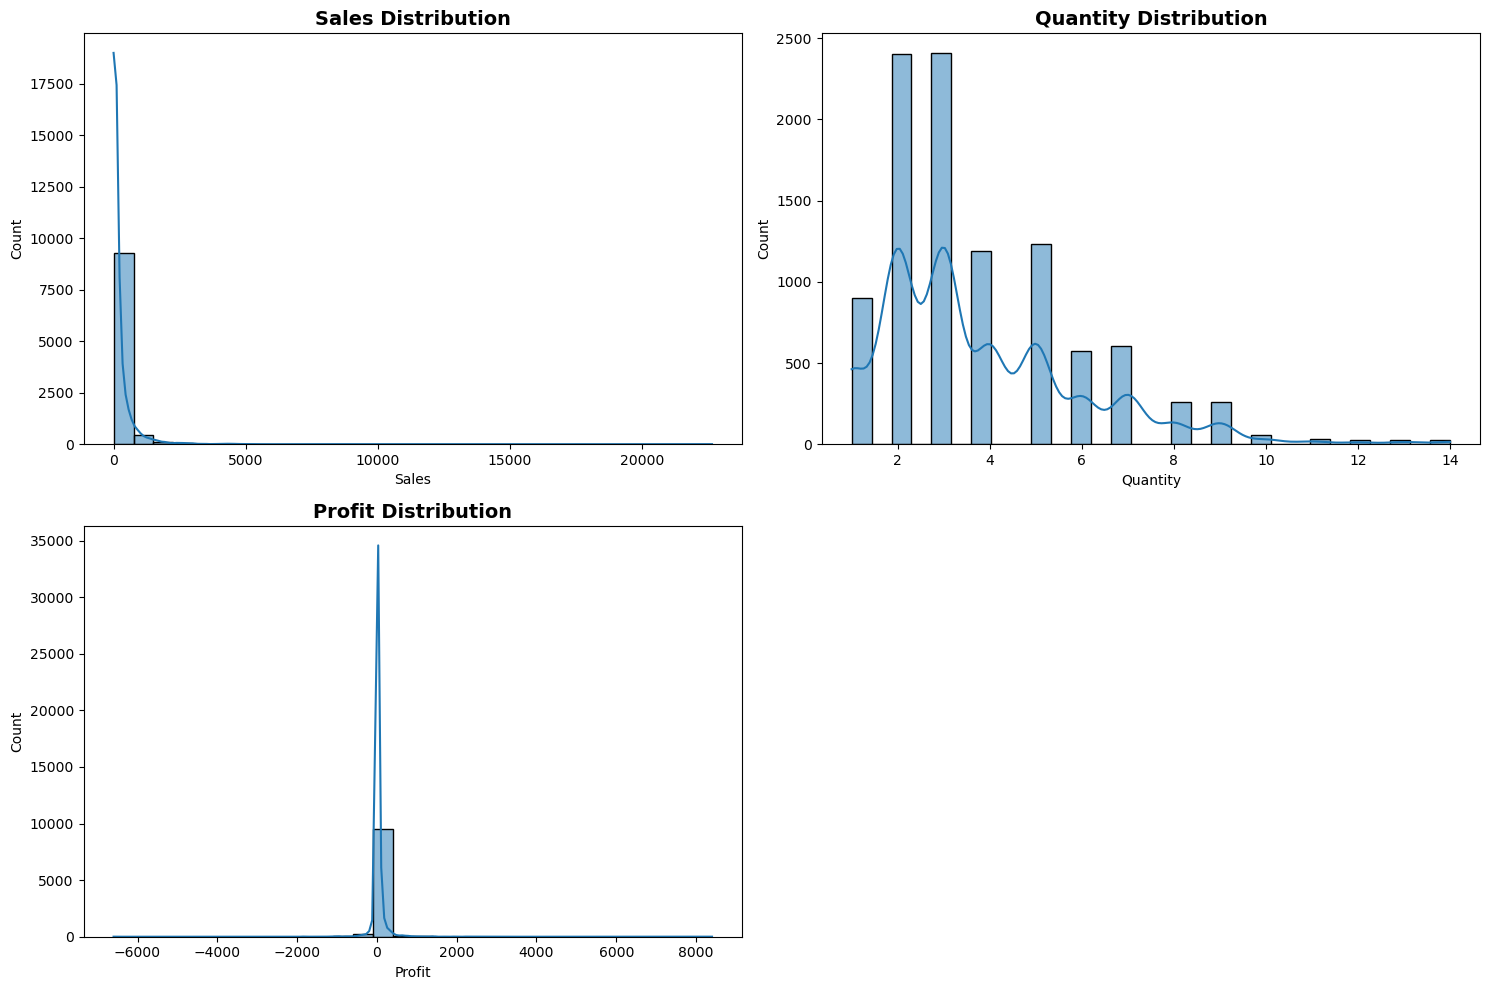

In [202]:
# Membuat figure dengan 3 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution (pojok kiri atas)
sns.histplot(df_cleaned['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution (pojok kanan atas)
sns.histplot(df_cleaned['Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution (pojok kiri bawah)
sns.histplot(df_cleaned['Profit'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Menghilangkan subplot yang tidak digunakan (pojok kanan bawah)
fig.delaxes(axes[1, 1])

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

<span style="color:yellow">**Insights :**</span>

**Sales Distribution:**


1. The distribution appears to be right-skewed (positively skewed)
2. There is a high concentration of sales in the lower range
3. There are several outliers in the higher sales range
4. This suggests that while most transactions have moderate sales values, there are some high-value transactions that could be significant to the business


**Quantity Distribution:**


1. Shows a highly right-skewed pattern
2. Most orders are for smaller quantities
3. There's a long tail indicating some bulk orders
4. This pattern is typical in retail where most customers buy in small quantities, but occasional bulk purchases occur


**Profit Distribution:**


1. Appears to be roughly normal but with some skewness
2. The presence of both positive and negative values indicates some transactions resulted in losses
3. The majority of transactions fall in the positive profit range
4. There appear to be some outliers in both the positive and negative directions

## <span style="color:#FFA500">**3.3 Data Cleaning & Preparation**</span>

### <span style="color:#FFE5B4">**3.3.1 Missing Value**</span>

In [189]:
# Missing Value

print('Missing values status:', df_cleaned.isnull().values.any())
missing_values = pd.DataFrame(df_cleaned.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df_cleaned.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()


Missing values status: False


,index,Total Null Values,Percentage
0,Order ID,0,0.0
1,Order Date,0,0.0
2,Contact Name,0,0.0
3,Country,0,0.0
4,City,0,0.0
5,Region,0,0.0
6,Subregion,0,0.0
7,Customer,0,0.0
8,Industry,0,0.0
9,Segment,0,0.0


<span style="color:yellow">**Note :**</span>

There is no need to handle missing values for this dataset. This can be seen very clearly when displaying both of the above outputs that show the number 0 (zero) in each of its columns

In [190]:
df_cleaned.duplicated().sum()

1

<span style="color:yellow">**Note :**</span>

There is 1 duplicated data and we have to know what and where the data is before we do the handling

In [194]:
# Find duplicate rows
duplicates = df_cleaned[df_cleaned.duplicated(keep=False)]

# Display duplicate rows
print("Duplicate rows and their data:")
print(duplicates)


Duplicate rows and their data:
              Order ID Order Date     Contact Name Country         City  \
3405  AMER-2020-150119 2020-04-23  Natalie Skinner  Mexico  Mexico City   
3406  AMER-2020-150119 2020-04-23  Natalie Skinner  Mexico  Mexico City   

     Region Subregion Customer Industry     Segment     Product    Sales  \
3405   AMER     LATAM   Itochu  Finance  Enterprise  FinanceHub  281.372   
3406   AMER     LATAM   Itochu  Finance  Enterprise  FinanceHub  281.372   

      Quantity   Profit  
3405         2 -12.0588  
3406         2 -12.0588  


<span style="color:yellow">**Note :**</span>

Both data are identical, and have to be removed

In [195]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify if duplicates were removed
print(f"Shape after removing duplicates: {df_cleaned.shape}")
print(f"Number of duplicate rows after cleaning: {df_cleaned.duplicated().sum()}")


Shape after removing duplicates: (9993, 14)
Number of duplicate rows after cleaning: 0


In [161]:
df.describe(include = 'object')

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


### <span style="color:#FFE5B4">**3.3.2 Outliers**</span>

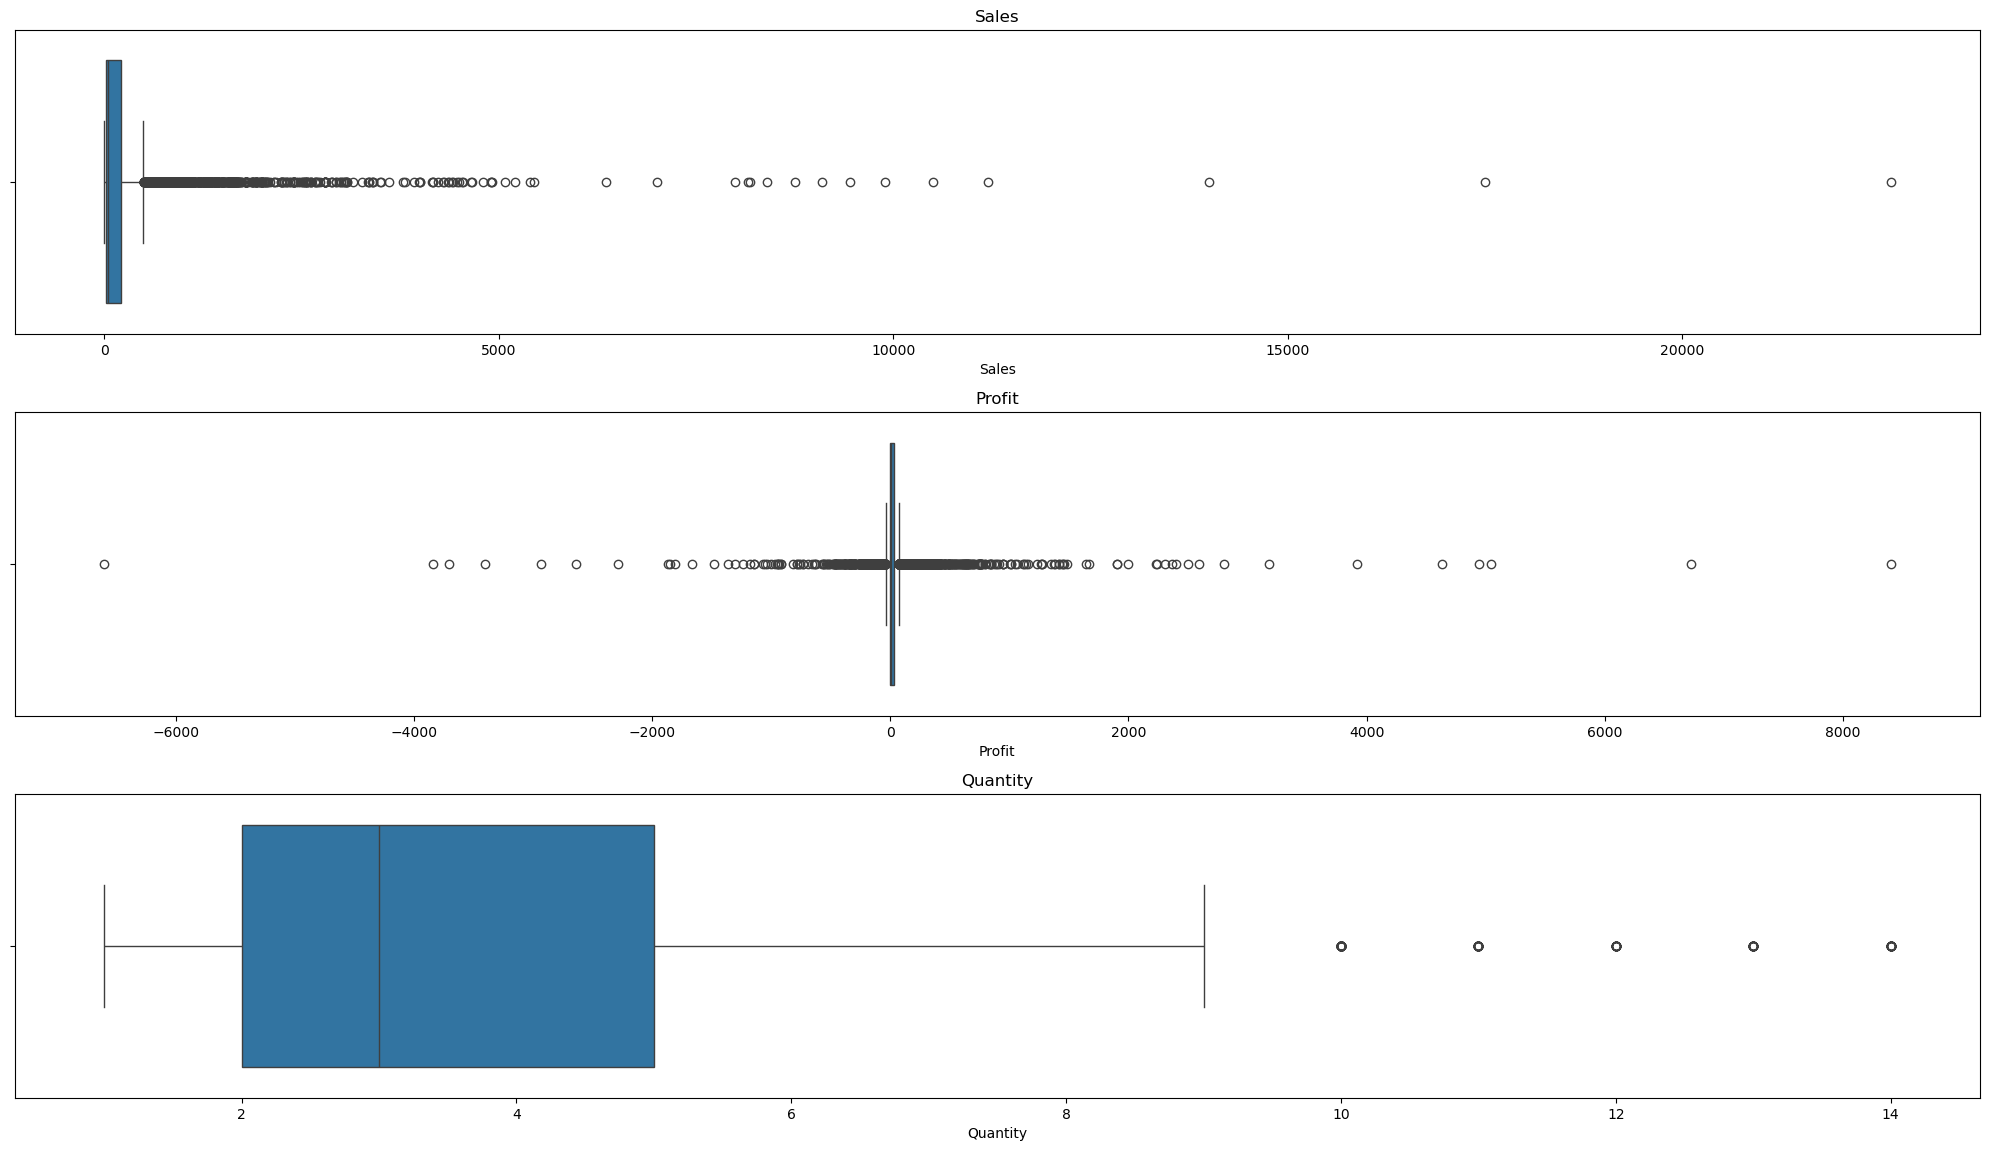

In [203]:
# Outliers
# Present Outliers with Box plot
feature = ['Sales', 'Profit', 'Quantity']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [165]:
# Observing the data of Sales, Dicsount, Profit, and Quantity
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


In [207]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Profit', 'Quantity']:
    # Calculate Q1, Q3, and IQR
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
    outliers = df_cleaned[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }


# summary for outliers_summary

outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

# Creating DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Splitting 'bounds' into 'lower_bound' and 'upper_bound' columns
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)

# Dropping the original 'bounds' column
outliers_summary_df.drop('bounds', axis=1, inplace=True)

# Reordering the columns for a better view
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Display DataFrame as a styled table
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table



,lower_bound,upper_bound,number_of_outliers
Sales,-272,499,1167
Profit,-40,71,1881
Quantity,-2,10,170


<span style="color:yellow">**Summary :**</span>


**1. Sales:**

- Lower Bound: -272
- Upper Bound: 499
- Number of Outliers: 1167

There's a substantial number of outliers in the Sales column, indicating a significant deviation from the typical range of values. This could imply frequent occurrences of extremely high or low sales figures that lie far beyond the expected values within this dataset.

**2. Profit:**

- Lower Bound: -40
- Upper Bound: 71
- Number of Outliers: 1881

Similar to Sales, Profit has a considerable number of outliers, indicating instances where the profits earned might significantly deviate from the usual expected profits. There might be a high frequency of both extremely low and high-profit margins beyond the defined bounds. paraphrase this to a more simple word explanation

**3. Quantity:**

- Lower Bound: -2
- Upper Bound: 10
- Number of Outliers: 170

The Quantity column has a smaller count of outliers, suggesting instances where the quantity of items ordered might be unusually high or low compared to the usual range of order quantities.

# <span style="color:#CC5500">**4. DATA ANALYSIS**</span>

The objective of this analysis was to identify the top 3 high-value customers with low recency in each region, narrowed down by country, to develop strategies aimed at increasing retention and purchase frequency. The insights derived from these key customers provide actionable paths for AWS to strengthen its market position in each region, especially by targeting engagement and frequency of interactions with high-value clients.

C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_15776\1958475963.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_per_region.index, y=profit_per_region.values, palette="viridis")


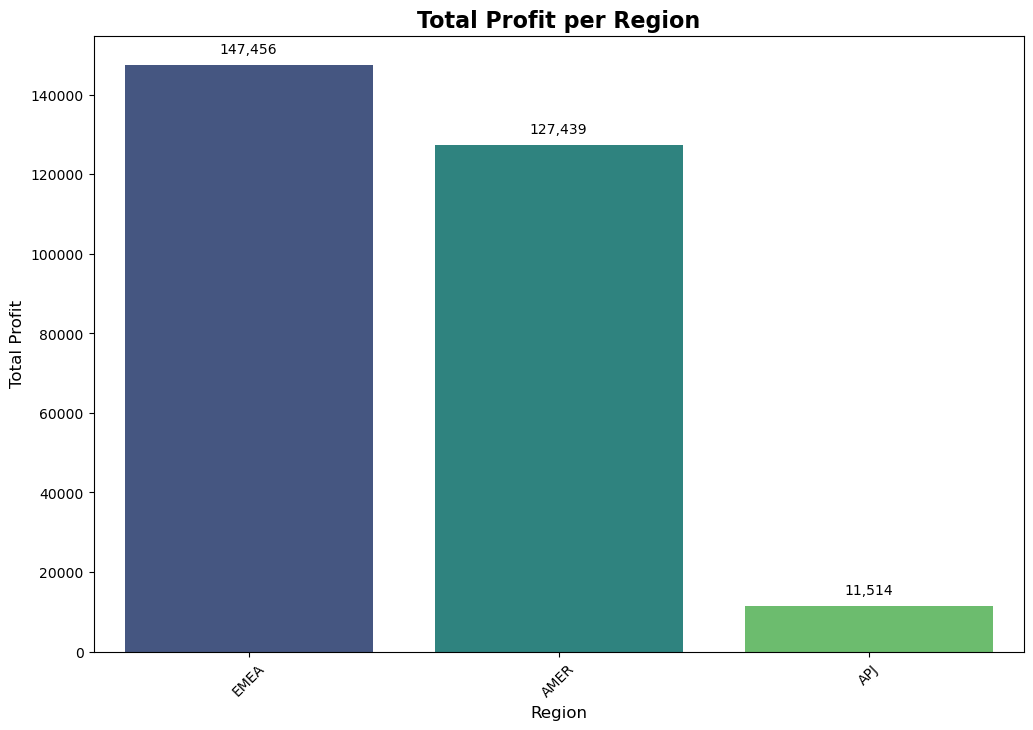

In [208]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total profit per region
profit_per_region = df_cleaned.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=profit_per_region.index, y=profit_per_region.values, palette="viridis")

# Menambahkan judul dan label
plt.title('Total Profit per Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Menambahkan nilai profit di atas setiap batang
for i, value in enumerate(profit_per_region.values):
    plt.text(i, value + 0.02 * profit_per_region.max(), f'{value:,.0f}', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()


<span style="color:yellow">**Insights :**</span>

1. EMEA has the highest total profit at $147,456, significantly exceeding the other regions.

2. AMER has the second-highest total profit at $127,439, indicating a strong performance in the Americas.

3. APJ shows the lowest total profit at $11,514, suggesting potential opportunities to improve profitability in the Asia-Pacific region.

In [209]:
df_cleaned

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.2480,3,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.9600,2,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.5760,2,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.6000,4,13.3200


In [221]:
# Pastikan kolom 'Order Date' dalam format datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

# Menghitung Monetary (total sales per customer per region, subregion, dan country)
monetary = df_cleaned.groupby(['Customer', 'Region', 'Subregion', 'Country'])['Sales'].sum().reset_index()
monetary = monetary.rename(columns={'Sales': 'Monetary'})

# Menghitung Profit (Total) per customer per region, subregion, dan country
profit_total = df_cleaned.groupby(['Customer', 'Region', 'Subregion', 'Country'])['Profit'].sum().reset_index()
profit_total = profit_total.rename(columns={'Profit': 'Profit (Total)'})

# Menentukan tanggal referensi untuk menghitung Recency (tanggal terbaru dalam dataset)
reference_date = df_cleaned['Order Date'].max()

# Menghitung Recency (hari sejak transaksi terakhir per customer per region, subregion, dan country)
recency = df_cleaned.groupby(['Customer', 'Region', 'Subregion', 'Country']).apply(lambda x: (reference_date - x['Order Date'].max()).days).reset_index()
recency.columns = ['Customer', 'Region', 'Subregion', 'Country', 'Recency']

# Menghitung Frequency (jumlah transaksi per customer per region, subregion, dan country)
frequency = df_cleaned.groupby(['Customer', 'Region', 'Subregion', 'Country']).size().reset_index(name='Frequency')

# Menggabungkan Recency, Frequency, Monetary, dan Profit (Total) menjadi dataframe baru all_customer
all_customer = recency.merge(frequency, on=['Customer', 'Region', 'Subregion', 'Country']) \
                      .merge(monetary, on=['Customer', 'Region', 'Subregion', 'Country']) \
                      .merge(profit_total, on=['Customer', 'Region', 'Subregion', 'Country'])

# Menampilkan hasil
all_customer


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_15776\4085975846.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recency = df_cleaned.groupby(['Customer', 'Region', 'Subregion', 'Country']).apply(lambda x: (reference_date - x['Order Date'].max()).days).reset_index()


,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total)
0,AT&T,AMER,LATAM,Argentina,19,3,798.930,355.8785
1,AT&T,AMER,LATAM,Brazil,751,4,1000.430,235.8448
2,AT&T,AMER,LATAM,Colombia,1163,1,11.850,3.7920
3,AT&T,AMER,LATAM,Mexico,1177,3,212.178,-73.2994
4,AT&T,AMER,NAMER,Canada,385,6,466.682,162.6895
...,...,...,...,...,...,...,...,...
1937,Wells Fargo,EMEA,MEA,Saudi Arabia,394,2,840.000,190.9008
1938,Wells Fargo,EMEA,MEA,South Africa,604,2,47.806,-17.3800
1939,Wells Fargo,EMEA,NOR,Finland,643,3,92.700,35.8254
1940,Wells Fargo,EMEA,NOR,Sweden,845,1,140.736,12.3144


In [241]:
# Import library yang diperlukan
import pandas as pd

# Fungsi untuk mengubah nilai ke dalam skala 1-5
def assign_r_score(recency):
    return pd.qcut(recency.rank(method="first"), 5, labels=[5, 4, 3, 2, 1])

def assign_fm_score(value):
    return pd.qcut(value.rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Menambahkan skor R, F, dan M pada dataframe all_customer
all_customer['R_Score'] = assign_r_score(all_customer['Recency'])
all_customer['F_Score'] = assign_fm_score(all_customer['Frequency'])
all_customer['M_Score'] = assign_fm_score(all_customer['Monetary'])

# Menampilkan hasil akhir
all_customer


,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total),R_Score,F_Score,M_Score
0,AT&T,AMER,LATAM,Argentina,19,3,798.930,355.8785,5,3,4
1,AT&T,AMER,LATAM,Brazil,751,4,1000.430,235.8448,2,3,4
2,AT&T,AMER,LATAM,Colombia,1163,1,11.850,3.7920,1,1,1
3,AT&T,AMER,LATAM,Mexico,1177,3,212.178,-73.2994,1,3,2
4,AT&T,AMER,NAMER,Canada,385,6,466.682,162.6895,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...
1937,Wells Fargo,EMEA,MEA,Saudi Arabia,394,2,840.000,190.9008,3,3,4
1938,Wells Fargo,EMEA,MEA,South Africa,604,2,47.806,-17.3800,2,3,1
1939,Wells Fargo,EMEA,NOR,Finland,643,3,92.700,35.8254,2,3,2
1940,Wells Fargo,EMEA,NOR,Sweden,845,1,140.736,12.3144,1,2,2


In [248]:
ac_sorted_profit = all_customer.sort_values("Profit (Total)", ascending = False)
ac_sorted_profit.head(30)

,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total),R_Score,F_Score,M_Score
570,Coca-Cola,APJ,IND,India,9,6,18712.080,8781.1561,5,4,5
1222,Mondelez International,AMER,NAMER,Canada,229,8,14513.224,6840.0288,3,5,5
1808,Valero Energy,AMER,LATAM,Brazil,378,4,10313.030,5058.0601,3,4,5
1093,Lowes,APJ,APAC,Philippines,43,1,10499.970,5039.9856,5,1,5
217,Anthem,EMEA,EU-WEST,Luxembourg,26,12,10701.660,4953.4073,5,5,5
1743,Trafigura Group,EMEA,UKIR,United Kingdom,42,16,14321.882,4789.7940,5,5,5
1133,Lukoil,EMEA,NOR,Finland,1020,4,6412.770,3192.0682,1,3,5
1016,Itochu,EMEA,UKIR,United Kingdom,63,25,9460.606,3146.9177,4,5,5
937,Honda Motor,EMEA,EU-WEST,Spain,28,4,9507.000,2993.7566,5,3,5
1789,United Parcel Service,EMEA,UKIR,United Kingdom,196,9,6124.740,2705.9060,3,5,5


In [242]:
all_customer_sorted = (all_customer[(all_customer['R_Score'].isin([1, 2]))]
                      .sort_values(["Profit (Total)"], ascending=[False])
                      .groupby('Region')
                      .head(3))
all_customer_sorted

,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total),R_Score,F_Score,M_Score
1133,Lukoil,EMEA,NOR,Finland,1020,4,6412.770,3192.0682,1,3,5
1917,Walt Disney,EMEA,EU-WEST,Spain,424,9,8112.910,2694.9072,2,5,5
957,Humana,AMER,NAMER,Canada,484,5,5961.130,2398.1473,2,4,5
1085,Lowes,AMER,LATAM,Argentina,623,3,9135.190,2381.1596,2,3,5
311,BNP Paribas,EMEA,EU-WEST,Poland,737,2,4909.610,2306.7423,2,2,5
1572,Siemens,APJ,APAC,China,1043,1,2541.980,1270.9900,1,2,5
274,BMW,AMER,NAMER,United States,478,11,4303.681,1083.8063,2,5,5
482,Chevron,APJ,APAC,Philippines,1139,3,3116.490,833.7633,1,3,5
64,Airbus,APJ,APAC,South Korea,1098,3,2583.190,654.9194,1,3,5


In [243]:
# Misalkan dataframe Anda memiliki kolom 'Region'
top3_emea = all_customer_sorted[all_customer_sorted['Region'] == 'EMEA']
top3_amer = all_customer_sorted[all_customer_sorted['Region'] == 'AMER']
top3_apj = all_customer_sorted[all_customer_sorted['Region'] == 'APJ']


### <span style="color:#FFE5B4">**4.1 Top 3 Customers in EMEA Region**</span>

In [244]:
top3_emea

,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total),R_Score,F_Score,M_Score
1133,Lukoil,EMEA,NOR,Finland,1020,4,6412.77,3192.0682,1,3,5
1917,Walt Disney,EMEA,EU-WEST,Spain,424,9,8112.91,2694.9072,2,5,5
311,BNP Paribas,EMEA,EU-WEST,Poland,737,2,4909.61,2306.7423,2,2,5


<span style="color:yellow">**Key Takeaways**</span>

**Lukoil:**

1. Lukoil has a recency score of 1020, which is on the lower end of the scale.
2. Lukoil has an R_Score of 1, indicating they are a high-risk customer.

**Walt Disney:**

1. Walt Disney has a recency score of 424, which is also on the lower end.
2. Walt Disney has an R_Score of 1, just like Lukoil, suggesting they are also a high-risk customer.

**BNP Paribas:**

1. BNP Paribas has a recency score of 737.
2. Similar to the other two customers, BNP Paribas has an R_Score of 1, indicating they are a high-risk customer.

### <span style="color:#FFE5B4">**4.2 Top 3 Customers in AMER Region**</span>

In [245]:
top3_amer

,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total),R_Score,F_Score,M_Score
957,Humana,AMER,NAMER,Canada,484,5,5961.130,2398.1473,2,4,5
1085,Lowes,AMER,LATAM,Argentina,623,3,9135.190,2381.1596,2,3,5
274,BMW,AMER,NAMER,United States,478,11,4303.681,1083.8063,2,5,5


<span style="color:yellow">**Key Takeaways**</span>

**Humana:**

1. Humana has a recency score of 484, which is on the lower end of the scale.
2. Humana has an R_Score of 2, indicating they are a moderate-risk customer.


**Lowes:**

1. Lowes has a recency score of 623, also on the lower end.
2. Lowes has an R_Score of 2, suggesting they are a moderate-risk customer.


**BMW:**

1. BMW has a recency score of 478, which is on the lower end.
2. BMW has an R_Score of 2, indicating they are a moderate-risk customer.

### <span style="color:#FFE5B4">**4.3 Top 3 Customers in APJ region**</span>

In [246]:
top3_apj

,Customer,Region,Subregion,Country,Recency,Frequency,Monetary,Profit (Total),R_Score,F_Score,M_Score
1572,Siemens,APJ,APAC,China,1043,1,2541.98,1270.9900,1,2,5
482,Chevron,APJ,APAC,Philippines,1139,3,3116.49,833.7633,1,3,5
64,Airbus,APJ,APAC,South Korea,1098,3,2583.19,654.9194,1,3,5


<span style="color:yellow">**Key Takeaways**</span>

**Siemens:**

1. Siemens has a recency score of 1043, which is on the higher end of the scale.
2. Siemens has an R_Score of 1, indicating they are a high-risk customer.


**Chevron:**

1. Chevron has a recency score of 1139, which is also on the higher end.
2. Chevron has an R_Score of 1, suggesting they are a high-risk customer.


**Airbus:**

1. Airbus has a recency score of 1098, which is on the higher end as well.
2. Airbus has an R_Score of 1, indicating they are a high-risk customer.

# <span style="color:#CC5500">**5. CONCLUSION**</span>

The objective of this analysis was to identify the top 3 high-value customers with low recency in each region, narrowed down by country, to develop strategies aimed at increasing retention and purchase frequency. The insights derived from these key customers provide actionable paths for AWS to strengthen its market position in each region, especially by targeting engagement and frequency of interactions with high-value clients.

<span style="color:yellow">**Key Findings**</span>
Top 3 High-Value Customers per Region with Low Recency

1. EMEA (Europe, Middle East, and Africa): This region has achieved the highest total profit. The top 3 high-value customers by country are Lukoil (Finland), Walt Disney (Spain), and BNP Paribas (Poland). Their recency scores indicate potential for increased engagement to support further sales and retention.

2. AMER (Americas): Top customers here are Humana (Canada), Lowes (Argentina), and BMW (US). These customers represent substantial growth opportunities within the region, where increased engagement frequency could yield strong returns.

3. APJ (Asia-Pacific and Japan): APJ has the lowest total profit, with key customers Siemens (China), Chevron (Philippines), and Airbus (South Korea). Despite low profitability, APJ shows promise if AWS can strengthen its relationship with these influential customers.

# <span style="color:#CC5500">**6. RECOMMENDATION**</span>

Based on these insights, AWS can apply the following strategies to boost retention and engagement frequency with these customers:

**1. EMEA**

Lukoil (Finland), Walt Disney (Spain), BNP Paribas (Poland)
Develop targeted campaigns emphasizing AWS’s role in digital transformation. Marketing can provide industry-specific insights and case studies on AWS’s impact in energy, entertainment, and finance to drive engagement and showcase AWS’s value in supporting innovation.

**2. AMER**

Humana (Canada), Lowes (Argentina), BMW (US)
Design cross-selling initiatives focusing on AWS’s data analytics and security features. Marketing should create materials tailored to healthcare, retail, and automotive sectors, demonstrating how AWS’s solutions can enhance operational efficiency and customer experience.

**3. APJ**

Siemens (China), Chevron (Philippines), Airbus (South Korea)
For APJ’s key accounts, run workshops that align AWS services with local industry trends, especially in manufacturing, energy, and aerospace. Marketing can promote these sessions and follow up with targeted content to reinforce AWS’s value, helping deepen relationships and drive service adoption.
By aligning AWS’s technical support with marketing campaigns for each customer, these actions will support customer retention, promote additional service use, and strengthen AWS’s regional presence.